<h1 style="color:orange">EXERCISE CLASS 2 - SPC for iid data </h1>

### EXERCISE 2

Data reported in `bpm_phase1.csv` represent daily resting heart measurements (BPM) of a professional athlete, recorded at the same hour each day.
1. Design an appropriate control chart to monitor the athlete's physical fitness. No information is available regarding potential causes of any out-of-control observation.
2. Determine if the values reported in `bpm_phase2.csv` are in-control.
3. Design an I-MR control chart with probability limits (i.e., use the true distribution of both statistics) with $\alpha=0.01$. With regard to the MR chart, use the half-normal distribution.





### Point 1 - Control charts for individual observations
Design an appropriate control chart to monitor the athlete's health. No information is available regarding potential causes of any out-of-control observation.

In [1]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import qdatoolkit as qda

# Import the dataset
phase_1 = pd.read_csv('../Data/bpm_phase1.csv')

# Inspect the dataset
phase_1.head()

,BPM
0,57.20
1,54.45
2,56.93
3,54.93
4,53.97


> Let's plot the data first.

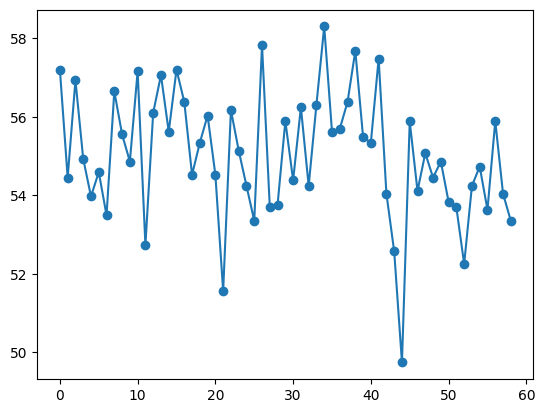

In [2]:
# Plot the data
plt.plot(phase_1, 'o-')
plt.show()

> Looks like there's one point with a value much lower than the others. But let's test all assumptions first.

Runs test statistic = -0.655
Runs test p-value = 0.513



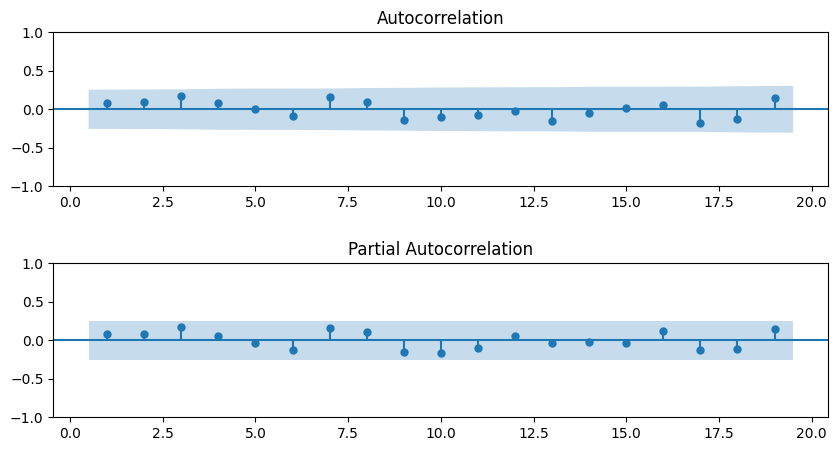

In [3]:
runs_statistic, runs_pvalue = qda.Assumptions(phase_1['BPM']).independence()

> From the results of the autocorrelation and the runs tests, there is no statistical evidence to assume non randomness of the process. 

> Now let's verify the normality assumption. 

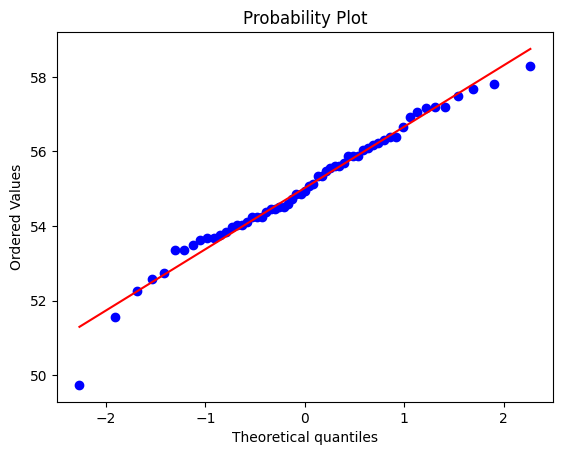

Shapiro-wilk test statistic = 0.979
Shapiro-wilk test p-value = 0.385


In [4]:
sw_statistic, sw_pvalue = qda.Assumptions(phase_1['BPM']).normality()

> We cannot reject the null hypothesis that the data are normally distributed with confidence 95%. However, one point deserves attention, as it is responsible for borderline normality.

> Let's go ahead with the design of the I-MR control chart. 
>
> Remember, the computation of moving ranges $MR$:
> 1. Compute the differences between consecutive observations (lag = 1): $D_i = X_{i+1} - X_i$.
> 2. Compute the absolute values of the differences: $MR = |D_i|$.

In [5]:
# make a copy of the data
IMR = phase_1.copy()

# Compute the moving ranges using the diff function
IMR['MR'] = IMR['BPM'].diff().abs()

# Print out descriptive statistics of MR and time
IMR.describe()

,BPM,MR
count,59.000000,58.000000
mean,55.023898,1.777759
std,1.626817,1.262370
min,49.740000,0.070000
25%,54.040000,0.892500
50%,54.930000,1.510000
75%,56.135000,2.245000
max,58.300000,6.140000


> Now let's make the control chart for the mean of the moving ranges.
>
> Remember the formulas for the control limits.
>
> **I chart**:
> - $UCL = \bar{x} + 3 \left(\frac{\bar{MR}}{d_2} \right)$
> - $CL = \bar{x}$
> - $LCL = \bar{x} - 3 \left(\frac{\bar{MR}}{d_2} \right)$
>
> **MR chart**:
> - $UCL = D_4 \bar{MR}$
> - $CL = \bar{MR}$
> - $LCL = 0$

In [6]:
# Define the control limits
d2 = qda.constants.getd2(2)
D4 = qda.constants.getD4(2)


# change the name of the column time to I
IMR.rename(columns={'BPM':'I'}, inplace=True)

# Print the first 5 rows of the new dataframe
IMR.head()

,I,MR
0,57.20,NaN
1,54.45,2.75
2,56.93,2.48
3,54.93,2.00
4,53.97,0.96


In [7]:
# Create columns for the upper and lower control limits
IMR['I_UCL'] = IMR['I'].mean() + (3*IMR['MR'].mean()/d2)
IMR['I_CL'] = IMR['I'].mean()
IMR['I_LCL'] = IMR['I'].mean() - (3*IMR['MR'].mean()/d2)
IMR['MR_UCL'] = D4 * IMR['MR'].mean()
IMR['MR_CL'] = IMR['MR'].mean()
IMR['MR_LCL'] = 0

# Print the first 5 rows of the new dataframe
IMR.head()

,I,MR,I_UCL,I_CL,I_LCL,MR_UCL,MR_CL,MR_LCL
0,57.20,NaN,59.750391,55.023898,50.297406,5.807105,1.777759,0
1,54.45,2.75,59.750391,55.023898,50.297406,5.807105,1.777759,0
2,56.93,2.48,59.750391,55.023898,50.297406,5.807105,1.777759,0
3,54.93,2.00,59.750391,55.023898,50.297406,5.807105,1.777759,0
4,53.97,0.96,59.750391,55.023898,50.297406,5.807105,1.777759,0


In [8]:
# Define columns for possible violations of the control limits
IMR['I_TEST1'] = np.where((IMR['I'] > IMR['I_UCL']) | 
                (IMR['I'] < IMR['I_LCL']), IMR['I'], np.nan)
IMR['MR_TEST1'] = np.where((IMR['MR'] > IMR['MR_UCL']) | 
                (IMR['MR'] < IMR['MR_LCL']), IMR['MR'], np.nan)

# Print the first 5 rows of the new dataframe
IMR.head()

,I,MR,I_UCL,I_CL,I_LCL,MR_UCL,MR_CL,MR_LCL,I_TEST1,MR_TEST1
0,57.20,NaN,59.750391,55.023898,50.297406,5.807105,1.777759,0,NaN,NaN
1,54.45,2.75,59.750391,55.023898,50.297406,5.807105,1.777759,0,NaN,NaN
2,56.93,2.48,59.750391,55.023898,50.297406,5.807105,1.777759,0,NaN,NaN
3,54.93,2.00,59.750391,55.023898,50.297406,5.807105,1.777759,0,NaN,NaN
4,53.97,0.96,59.750391,55.023898,50.297406,5.807105,1.777759,0,NaN,NaN


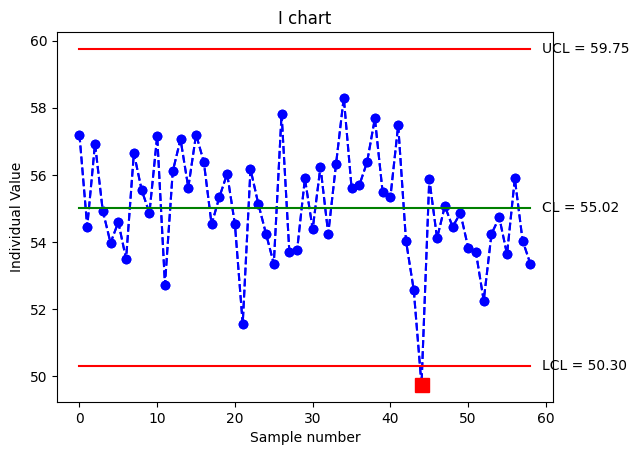

In [9]:
# Plot the I chart
plt.title('I chart')
plt.plot(IMR['I'], color='b', linestyle='--', marker='o')
plt.plot(IMR['I'], color='b', linestyle='--', marker='o')
plt.plot(IMR['I_UCL'], color='r')
plt.plot(IMR['I_CL'], color='g')
plt.plot(IMR['I_LCL'], color='r')
plt.ylabel('Individual Value')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(IMR)+.5, IMR['I_UCL'].iloc[0], 'UCL = {:.2f}'.format(IMR['I_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(IMR)+.5, IMR['I_CL'].iloc[0], 'CL = {:.2f}'.format(IMR['I_CL'].iloc[0]), verticalalignment='center')
plt.text(len(IMR)+.5, IMR['I_LCL'].iloc[0], 'LCL = {:.2f}'.format(IMR['I_LCL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(IMR['I_TEST1'], linestyle='none', marker='s', color='r', markersize=10)
plt.show()

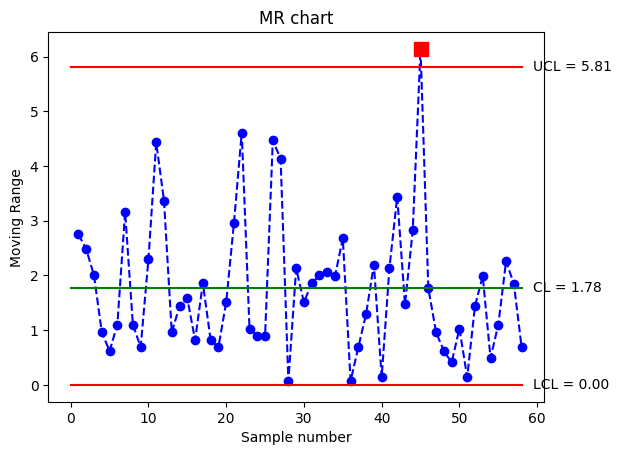

In [10]:
plt.title('MR chart')
plt.plot(IMR['MR'], color='b', linestyle='--', marker='o')
plt.plot(IMR['MR_UCL'], color='r')
plt.plot(IMR['MR_CL'], color='g')
plt.plot(IMR['MR_LCL'], color='r')
plt.ylabel('Moving Range')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(IMR)+.5, IMR['MR_UCL'].iloc[0], 'UCL = {:.2f}'.format(IMR['MR_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(IMR)+.5, IMR['MR_CL'].iloc[0], 'CL = {:.2f}'.format(IMR['MR_CL'].iloc[0]), verticalalignment='center')
plt.text(len(IMR)+.5, IMR['MR_LCL'].iloc[0], 'LCL = {:.2f}'.format(IMR['MR_LCL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(IMR['MR_TEST1'], linestyle='none', marker='s', color='r', markersize=10)
plt.show()

> There is one point outside the control limits. Since no information is available regarding the nature of the out-of-control condition, we assume that it is due to the natural variability of the process. Therefore, we de not recompute the control limits.

> You can also design the control chart using the `IMR` function in `qda.ControlCharts` package.

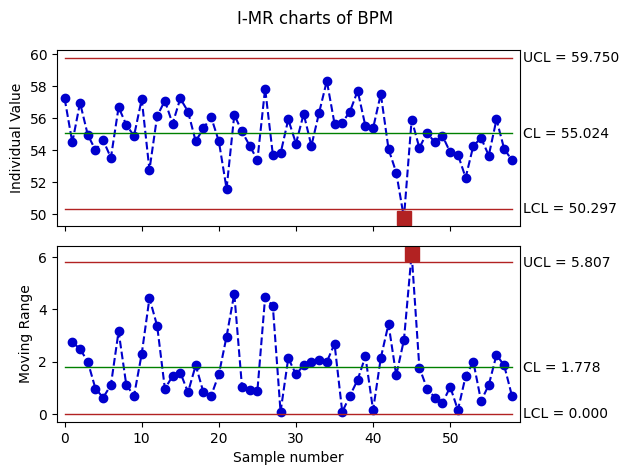

In [11]:
data_IMR = qda.ControlCharts.IMR(phase_1, 'BPM')

### Point 2 - Phase 2
Determine if the values reported in `bpm_phase2.csv` are in-control.

In [12]:
# Import the dataset
phase_2 = pd.read_csv('../Data/bpm_phase2.csv')

# Add the new observations to the dataset
phase_1_2 = pd.concat((phase_1, phase_2), ignore_index=True)

phase_1_2.head()

,BPM
0,57.20
1,54.45
2,56.93
3,54.93
4,53.97


> Use the parameter `subset_size` to specify the number of observations to be used for the computation of the control limits (Phase 1 data).

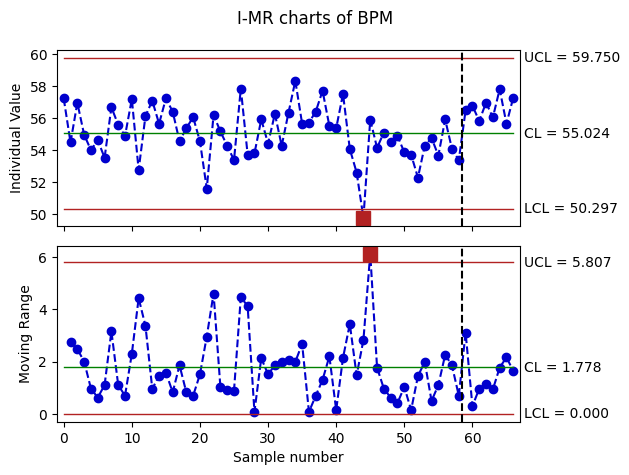

In [13]:
new_data_IMR = qda.ControlCharts.IMR(phase_1_2, 'BPM', subset_size=len(phase_1))

### Point 3 - Probabilistic control charts
Design an I-MR control chart with probability limits (i.e., use the true distribution of both statistics) with $\alpha=0.01$. For the MR chart, use the half-normal distribution.

> Let's find the new value of K for designing the IMR control chart. 

In [14]:
alpha = 0.01
K_alpha = stats.norm.ppf(1-alpha/2)
print('New K value = %.3f' % K_alpha)

New K value = 2.576


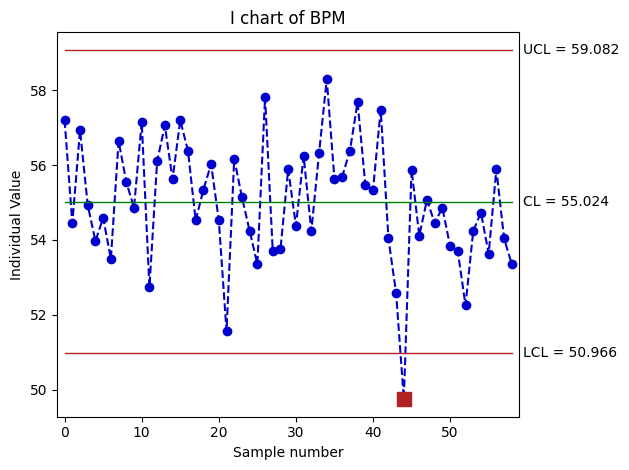

In [15]:
# Design the I control chart
IMR = qda.ControlCharts.I(phase_1, 'BPM', K = K_alpha)

> Let's redesign the MR control chart by using the half-normal approximation:
> - $UCL = D_{1-\alpha/2} \frac{\bar{MR}}{d_2}$
> - $LCL = D_{\alpha/2} \frac{\bar{MR}}{d_2}$
>
> For $n=2$ (Alwan, Appendix A):
> - $D_{1-\alpha/2} = \sqrt{2} z_{\alpha/4}$
> - $D_{\alpha/2} = \sqrt{2} z_{0.5 - \alpha/4}$

In [16]:
D_UCL = np.sqrt(2) * stats.norm.ppf(1-alpha/4)
D_LCL = np.sqrt(2) * stats.norm.ppf(1 - (1/2 - alpha/4))

MR_UCL = D_UCL * IMR['MR'].mean()/qda.constants.getd2(2)
MR_LCL = D_LCL * IMR['MR'].mean()/qda.constants.getd2(2)

print('MR_UCL = %.4f' % MR_UCL)
print('MR_LCL = %.4f' % MR_LCL)

MR_UCL = 6.2543
MR_LCL = 0.0140


> Let's plot the MR chart with the half-normal approximation.

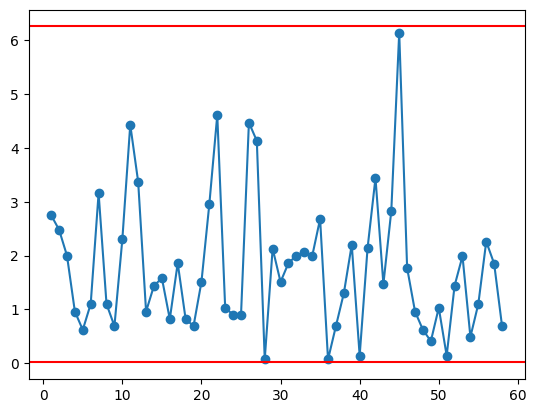

In [17]:
IMR['MR_TEST1'] = np.where((IMR['MR'] > MR_UCL) | 
                                (IMR['MR'] < MR_LCL), IMR['MR'], np.nan)

plt.plot(IMR['MR'], 'o-')
plt.axhline(MR_UCL, color = 'r')
plt.axhline(MR_LCL, color = 'r')
plt.plot(IMR['MR_TEST1'], linestyle='none', marker='s', color='r', markersize=10)
plt.show()